## Day 2: Regression Analysis and Predictive Modeling



Topics: Linear vs. Polynomial Regression, Gradient Descent

### 1. Setup 

In [1]:
 !pip install pandas matplotlib seaborn numpy scikit-learn


### 2. Linear Regression


#### 2.1 Generate data

First, let's look at the simplest form of machine learning.
Imagine a data where there is a linear relationship.


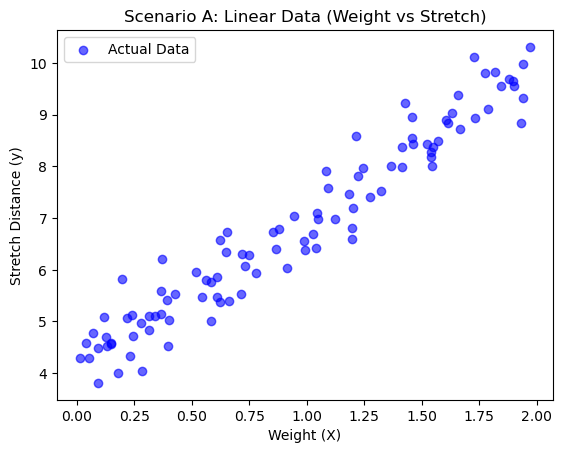

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# 1. Generate synthetic data (Simulating a Spring: Weight vs Stretch)
np.random.seed(42)
X_linear = 2 * np.random.rand(100, 1)  # Random weights between 0 and 2 kg
y_linear = 4 + 3 * X_linear + np.random.randn(100, 1) * 0.5 
# Formula: y = 4 (intercept) + 3x (slope) + Noise

# 2. Visualize
plt.scatter(X_linear, y_linear, color='blue', alpha=0.6, label='Actual Data')
plt.title("Scenario A: Linear Data (Weight vs Stretch)")
plt.xlabel("Weight (X)")
plt.ylabel("Stretch Distance (y)")
plt.legend()
plt.show()

##### 2.2 Fitting a Linear Regression Model

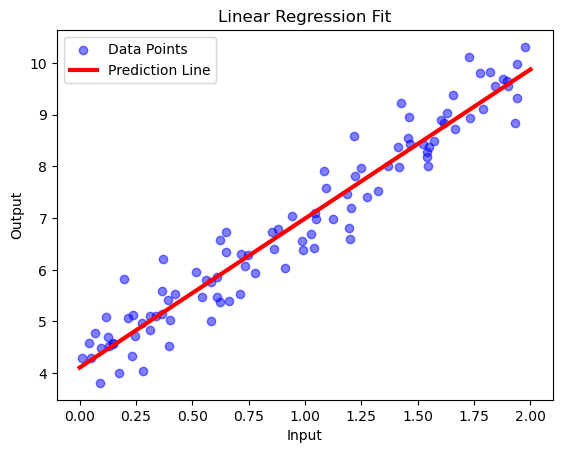

Model Learned -> Intercept: 4.11, Slope: 2.89
Actual Formula -> Intercept: 4.00, Slope: 3.00


In [4]:
# Import the necessary modules for linear regression and evaluation
from sklearn.linear_model import LinearRegression        # For simple linear regression
from sklearn.metrics import mean_squared_error, mean_absolute_error  # For regression performance metrics
from sklearn.model_selection import train_test_split     # For splitting data (not used directly here)

# Create the LinearRegression model instance
lin_reg = LinearRegression()

# Fit the linear regression model using the generated linear data
lin_reg.fit(X_linear, y_linear)

# Predict outputs for new data points (for the endpoints 0 and 2)
X_new = np.array([[0], [2]])
y_predict = lin_reg.predict(X_new)

# Visualize the original data and the model's linear prediction
plt.scatter(X_linear, y_linear, color='blue', alpha=0.5, label='Data Points')        # Original data
plt.plot(X_new, y_predict, "r-", linewidth=3, label='Prediction Line')               # Regression line
plt.title("Linear Regression Fit")
plt.xlabel("Input")
plt.ylabel("Output")
plt.legend()
plt.show()

# Display the learned parameters vs the actual formula constants
print(f"Model Learned -> Intercept: {lin_reg.intercept_[0]:.2f}, Slope: {lin_reg.coef_[0][0]:.2f}")
print("Actual Formula -> Intercept: 4.00, Slope: 3.00")

#### 3. Scenario B: The Non-Linear Relationship


Now, let's imagine a Battery's Temperature as it charges.
But if the cooling fan kicks in, it might stabilize.

#### 3.1 Generate a Non linear data

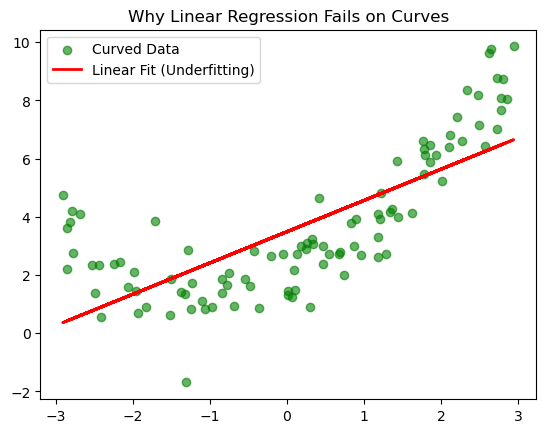

In [5]:

# 1. Generate synthetic data (Quadratic equation: y = x^2)
m = 100
X_curve = 6 * np.random.rand(m, 1) - 3
y_curve = 0.5 * X_curve**2 + X_curve + 2 + np.random.randn(m, 1)

# 2. Try to fit a LINEAR model to this CURVED data
lin_reg_fail = LinearRegression()
lin_reg_fail.fit(X_curve, y_curve)
y_pred_line = lin_reg_fail.predict(X_curve)

# 3. Visualize the Failure
plt.scatter(X_curve, y_curve, color='green', alpha=0.6, label='Curved Data')
plt.plot(X_curve, y_pred_line, color='red', linewidth=2, label='Linear Fit (Underfitting)')
plt.title("Why Linear Regression Fails on Curves")
plt.legend()
plt.show()

# Interpretation: 
# The red line misses most of the data. This is called "Underfitting".

#### 3.2 Solution: Polynomial Regression


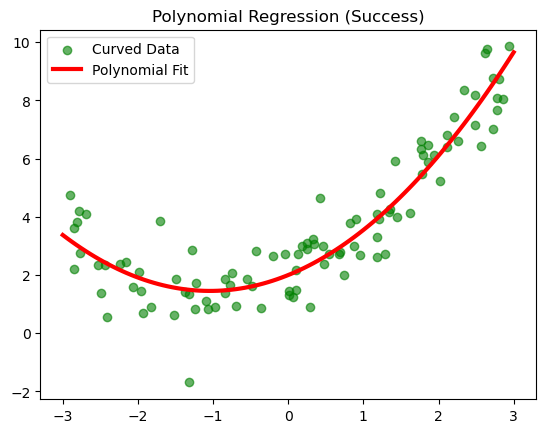

In [6]:
from sklearn.preprocessing import PolynomialFeatures # For creating polynomial features (for polynomial regression)

# 1. Transform the features (Add x^2 to the dataset)
# Degree=2 means we want to look at x and x^2
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_curve)

# 2. Fit a Linear Regression on the Transformed Data
# (The model thinks it's linear, but because we gave it squared numbers, it draws a curve!)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y_curve)

# 3. Sorting data for smooth plotting
X_new_curve = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new_curve)
y_new_curve = poly_reg.predict(X_new_poly)

# 4. Visualize
plt.scatter(X_curve, y_curve, color='green', alpha=0.6, label='Curved Data')
plt.plot(X_new_curve, y_new_curve, "r-", linewidth=3, label='Polynomial Fit')
plt.title("Polynomial Regression (Success)")
plt.legend()
plt.show()

### 4. Gradient Descent

Gradient Descent is an iterative optimization algorithm that minimizes a loss function by updating model parameters in the direction of the negative gradient (steepest descent).  

The loss function defines how wrong the model’s predictions are and guides the direction of parameter updates.  

Based on the choice of loss function, the optimization path and convergence behavior change.  

In basic regression tasks, two commonly used loss functions are employed, Mean Squared error (MSE) and Mean absolute error (MAE).

These loss functions determine how errors are measured and minimized during training.


In [7]:
from sklearn.linear_model import SGDRegressor

print("Training Linear Regression using Gradient Descent...\n")

# --------------------------------------------------
# What is happening here?
# We are using Gradient Descent to find the best
# straight line: y = m*x + c
# --------------------------------------------------

# Create the SGDRegressor model
sgd_reg = SGDRegressor(
    max_iter=1000,     # Maximum number of updates (steps downhill)
    tol=1e-3,          # Stop early if improvement becomes very small
    eta0=0.1,          # Learning rate (step size)
    random_state=42    # For reproducible results
)

# IMPORTANT:
# Gradient Descent expects the target (y) to be a 1D array
y_linear_flat = y_linear.ravel()

# Train the model
# By default Mean squared error
# This is where Gradient Descent happens internally
sgd_reg.fit(X_linear, y_linear_flat)

# Extract learned parameters
intercept = sgd_reg.intercept_[0]
slope = sgd_reg.coef_[0]

print(f"Model learned the equation:")
print(f"y = {slope:.2f}x + {intercept:.2f}")


Training Linear Regression using Gradient Descent...

Model learned the equation:
y = 2.92x + 4.12


### Case Study: House Price Prediction using Regression

### Objective
To predict the median house price in California districts using numerical features such as:
- Median income
- House age
- Number of rooms
- Population

This is a real-world regression problem commonly used in urban planning and real estate analytics.



In [8]:
### Imports of the dataset


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error


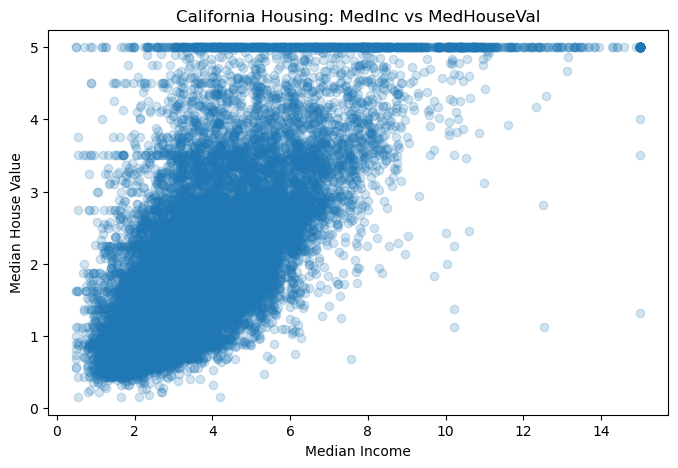

In [43]:
# Load California Housing dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

# Plot Median Income vs Median House Value
plt.figure(figsize=(8,5))
plt.scatter(df['MedInc'], df['MedHouseVal'], alpha=0.2)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('California Housing: MedInc vs MedHouseVal')
plt.show()


In [44]:
# Select Median Income as feature for regression (simple 1D visualization)
X = df[['MedInc']]
# Target variable: Median House Value
y = df['MedHouseVal']

# Split data into train and test sets (80% train, 20% test, fixed random state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [46]:
# Instantiate a linear regression model
lin_reg = LinearRegression()
# Fit the model using the training data
lin_reg.fit(X_train, y_train)

# Predict target values for the test set
y_pred_lin = lin_reg.predict(X_test)

# Evaluate and print Linear Regression performance metrics
print("Linear Regression Performance:")
print("MSE:", mean_squared_error(y_test, y_pred_lin))  # Mean Squared Error
print("MAE:", mean_absolute_error(y_test, y_pred_lin))  # Mean Absolute Error


Linear Regression Performance:
MSE: 0.7091157771765548
MAE: 0.6299086530093759


In [47]:
# Create polynomial features up to degree 2 from MedInc
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)  # Fit and transform training features
X_test_poly = poly.transform(X_test)        # Transform test features

# Instantiate and fit a LinearRegression model using polynomial features
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# Predict house values on the test set using the trained polynomial regression model
y_pred_poly = poly_reg.predict(X_test_poly)

# Print performance metrics for the polynomial regression model
print("Polynomial Regression Performance:")
print("MSE:", mean_squared_error(y_test, y_pred_poly))   # Mean Squared Error
print("MAE:", mean_absolute_error(y_test, y_pred_poly))   # Mean Absolute Error


Polynomial Regression Performance:
MSE: 0.7032732680932144
MAE: 0.6282915588701903


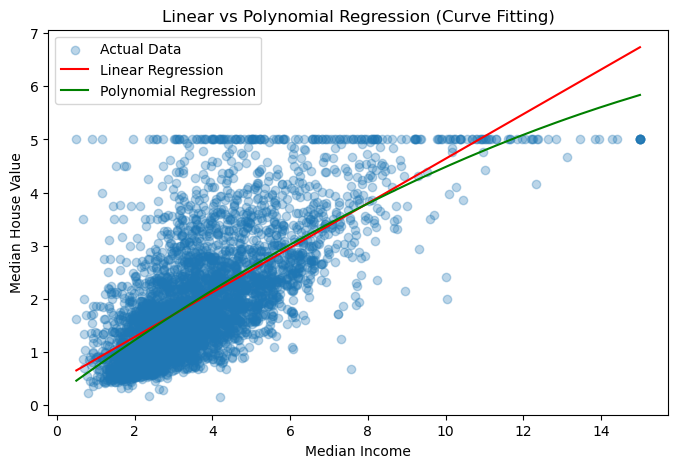

In [48]:
# Sort test data for plotting smooth regression curves
sort_idx = X_test['MedInc'].argsort()  # Indices to sort by Median Income
X_sorted = X_test.iloc[sort_idx]        # Sorted Median Income values
y_sorted = y_test.iloc[sort_idx]        # Corresponding actual house values

plt.figure(figsize=(8,5))  # Create the plot with specified size

# Scatter plot of actual test data
plt.scatter(X_test, y_test, alpha=0.3, label="Actual Data")

# Plot linear regression predictions (sorted to make the curve smooth)
plt.plot(X_sorted, y_pred_lin[sort_idx], color='red', label="Linear Regression")

# Plot polynomial regression predictions (also sorted)
plt.plot(X_sorted, y_pred_poly[sort_idx], color='green', label="Polynomial Regression")

plt.xlabel("Median Income")             # X-axis label
plt.ylabel("Median House Value")        # Y-axis label
plt.title("Linear vs Polynomial Regression (Curve Fitting)")  # Title
plt.legend()                           # Add legend
plt.show()                             # Display the plot
